### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [161]:
data = pd.read_csv('data/coupons.csv')

In [163]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [166]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [170]:
# are there potential underage drinkers in the data set accepting coupons?
# Yikes, looks like it

data[data['age'] == 'below21']['Y'].mean()

0.6343692870201096

In [172]:
# weird that the car column has very few rows compared 
# to the rest of the data set

data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [175]:
df = data.copy()
df['Y'].describe()

count    12684.000000
mean         0.568433
std          0.495314
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

In [177]:
# going to not use the 'car' column and will discard underage Bar coupon data

4. What proportion of the total observations chose to accept the coupon?



In [180]:
df['Y'].mean()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

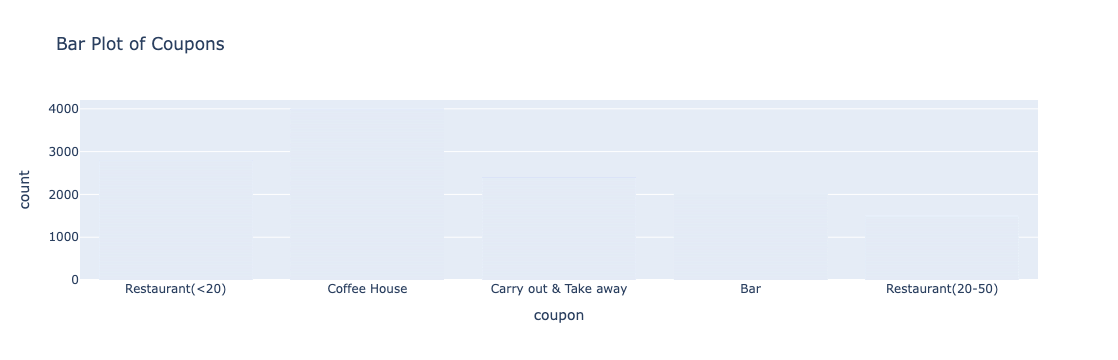

In [183]:
px.bar(df, x='coupon', title = "Bar Plot of Coupons")

6. Use a histogram to visualize the temperature column.

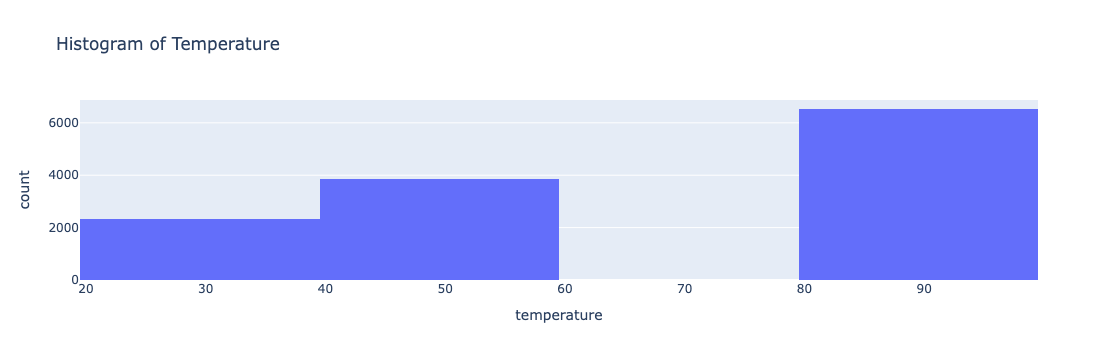

In [186]:
px.histogram(df, x='temperature', title="Histogram of Temperature")

In [188]:
# what socioeconomic groups are in the data set

df['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [191]:
# We need to filter out those that are underage

barcouponsonly = df[(df['coupon'] == 'Bar') & (df['age'] != 'below21')]
barcouponsonly.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [194]:
# We can take the mean of the 'Y' column to answer what proportion of bar coupons were accepted

print("The proportion of bar coupons that were accepted for those of age was", barcouponsonly['Y'].mean())

The proportion of bar coupons that were accepted for those of age was 0.4098445595854922


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


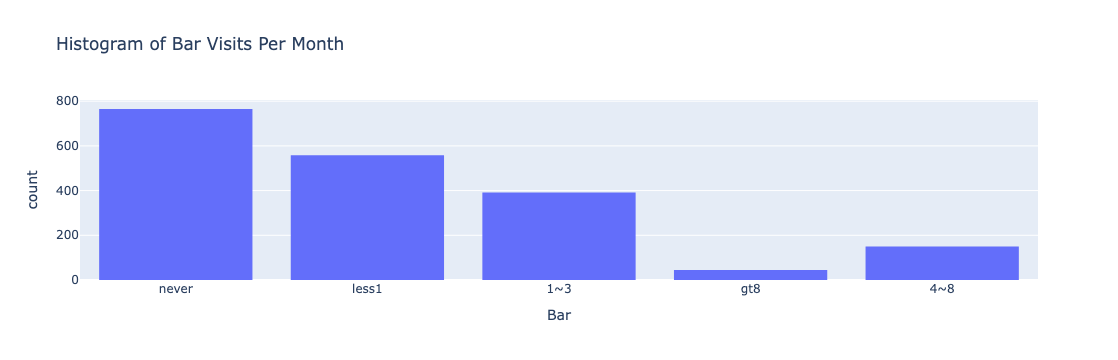

In [197]:
px.histogram(barcouponsonly, x='Bar', title = "Histogram of Bar Visits Per Month")

In [199]:
# create the criteria we are looking for
three_or_fewer_times = ['never','less1','1~3']
more_than_three_times = ['4~8', 'gt8']

#filter out the data set
three_few = barcouponsonly[barcouponsonly['Bar'].isin(three_or_fewer_times)]
three_more = barcouponsonly[barcouponsonly['Bar'].isin(more_than_three_times)]

# summarize the results
print("The acceptance rate for fewer than 3 bars per month is", three_few['Y'].mean()) 
print("and for 3 or more bars per month is",three_more['Y'].mean())

The acceptance rate for fewer than 3 bars per month is 0.3687281213535589
and for 3 or more bars per month is 0.7743589743589744


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [202]:
# create the criteria we are looking for
more_than_once_month = ['1~3','4~8','gt8']
over_25_years_old = ['26','31','36','41','46','50plus']

#filter out the data set
bar_over25 = barcouponsonly[barcouponsonly['Bar'].isin(more_than_once_month)]
bar_over25 = bar_over25[bar_over25['age'].isin(over_25_years_old)]

#determine non-overlapping pieces for the all others
non_overlapping_index = barcouponsonly.index.symmetric_difference(bar_over25.index)
all_others = barcouponsonly.loc[non_overlapping_index]

# summarize the results
print("The acceptance rate for people who go to a bar more than once a month and are over the age of 25 is", bar_over25['Y'].mean(),)
print("and for everyone else is", all_others['Y'].mean(), ", or about",bar_over25['Y'].mean()/all_others['Y'].mean(),"difference.")


The acceptance rate for people who go to a bar more than once a month and are over the age of 25 is 0.6952380952380952
and for everyone else is 0.3304635761589404 , or about 2.10382670102109 difference.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


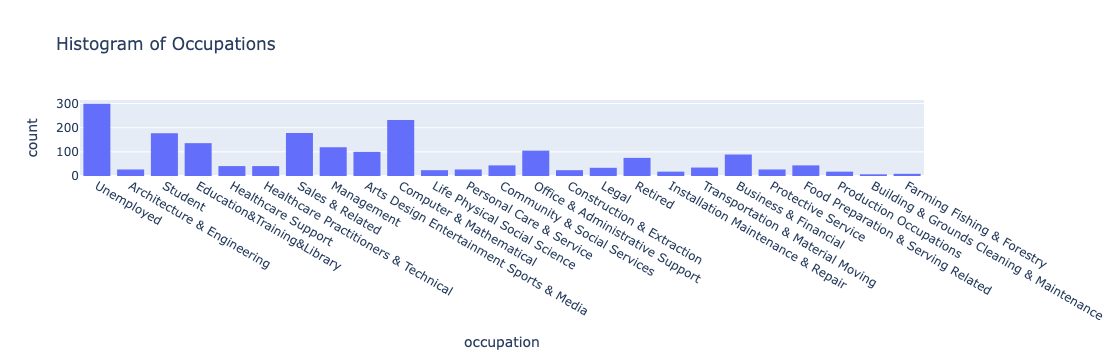

In [205]:
px.histogram(barcouponsonly, x='occupation', title = "Histogram of Occupations")

In [207]:
df['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [209]:
# create the criteria we are looking for
not_alone_with_kids = ['Friend(s)','Partner']

# filter the data set
not_farm_fish_forestry = barcouponsonly[barcouponsonly['Bar'].isin(more_than_once_month)]
not_farm_fish_forestry = not_farm_fish_forestry[not_farm_fish_forestry['passanger'].isin(not_alone_with_kids)]
not_farm_fish_forestry = not_farm_fish_forestry[not_farm_fish_forestry['occupation'] != 'Farming Fishing & Forestry']

# summarize the results
print("The acceptance rate for people who go to a bar more than once a month and had a passenger that was not")
print("a kid and occupations outside of farming, fishing, or forestry is", not_farm_fish_forestry['Y'].mean())

The acceptance rate for people who go to a bar more than once a month and had a passenger that was not
a kid and occupations outside of farming, fishing, or forestry is 0.7150259067357513


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [212]:
# create the criteria we are looking for
under_thirty_yearsold = ['below21', '21', '26']
income_values = ['$25000 - $37499','$12500 - $24999','$37500 - $49999']
cheap_restaurant_values = ['4~8','gt8']

# filter the data set for going to bars more than once a month, had passengers that were not a kid, and were not widowed
not_widowed_withpassengers = barcouponsonly[barcouponsonly['Bar'].isin(more_than_once_month)]
not_widowed_withpassengers = not_widowed_withpassengers[not_widowed_withpassengers['passanger'].isin(not_alone_with_kids)]
not_widowed_withpassengers = not_widowed_withpassengers[not_widowed_withpassengers['maritalStatus'] != 'Widowed']

# filter the data set for going to bars more than once a month and are under the age of 30
under_30 = barcouponsonly[barcouponsonly['age'].isin(under_thirty_yearsold)]
under_30 = under_30[under_30['Bar'].isin(more_than_once_month)]

# filter the data set for going to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurants = barcouponsonly[barcouponsonly['RestaurantLessThan20'].isin(cheap_restaurant_values)]
cheap_restaurants = cheap_restaurants[cheap_restaurants['income'].isin(income_values)]

# summarize the results
print("Drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed") 
print("accepted at a rate of", not_widowed_withpassengers['Y'].mean())
print("Drivers that go to bars more than once a month and are under the age of 30 accepted at a rate of",under_30['Y'].mean())
print("Drivers that go to cheap restaurants more than 4 times a month and whose income is less than 50K accepted")
print("at a rate of",cheap_restaurants['Y'].mean())

Drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed
accepted at a rate of 0.7150259067357513
Drivers that go to bars more than once a month and are under the age of 30 accepted at a rate of 0.7313432835820896
Drivers that go to cheap restaurants more than 4 times a month and whose income is less than 50K accepted
at a rate of 0.45977011494252873


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [215]:
print("Generally, I would hypothesize that drivers who acccepted bar coupons tend to go to bars at least once per month.")

Generally, I would hypothesize that drivers who acccepted bar coupons tend to go to bars at least once per month.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [218]:
# what is the distribution by income of bar coupons
barcouponsonly['income'].value_counts()

income
$25000 - $37499     307
$12500 - $24999     282
$100000 or More     278
$37500 - $49999     259
$50000 - $62499     259
$75000 - $87499     151
Less than $12500    137
$87500 - $99999     132
$62500 - $74999     125
Name: count, dtype: int64

Text(0.5, 0.98, 'Histogram of Coupon Acceptance by Income')

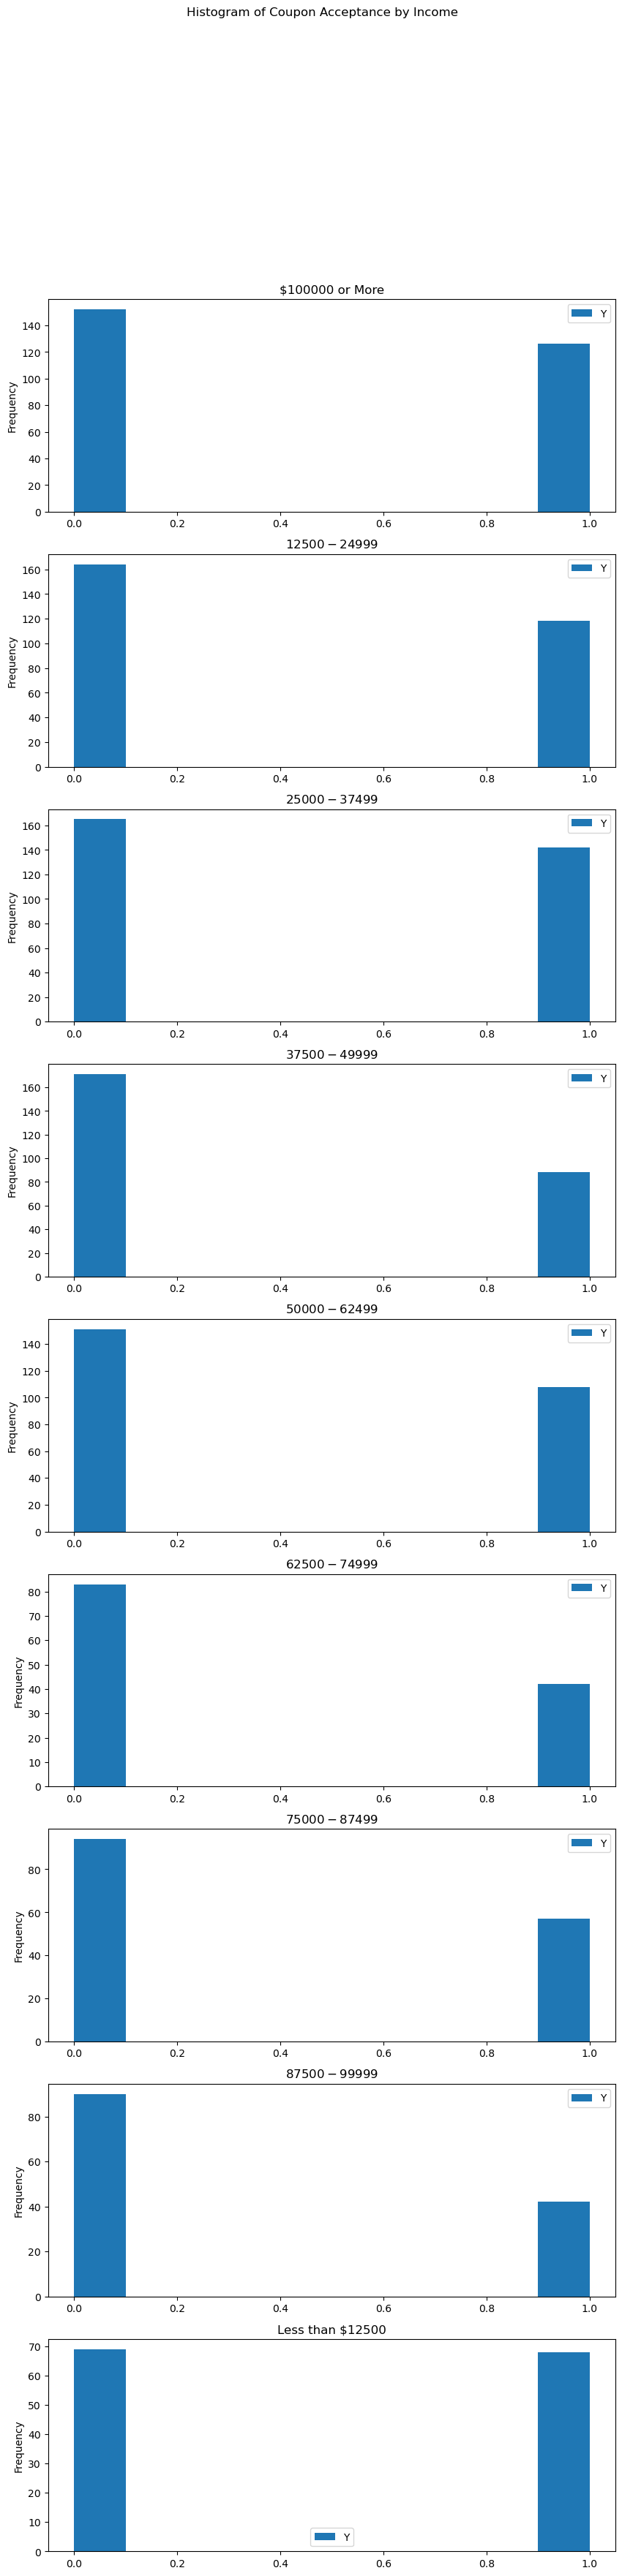

In [220]:
# plot to see if trends by income of bar coupon offer acceptance
barcouponsonly.plot.hist(column='Y', by='income', figsize=(10, 40))
plt.suptitle("Histogram of Coupon Acceptance by Income")

In [221]:
# Let's look by age and income what is the acceptance
grouped_mean = barcouponsonly.groupby(['age','income'])['Y'].mean()
grouped_mean = grouped_mean.reset_index(name = 'mean')
#print(grouped_mean)
#grouped_mean.value_counts()

average for 21 is 0.5396304611752806
average for 26 is 0.45284452018628457
average for 31 is 0.35466968166700674
average for 36 is 0.25216829445756644
average for 41 is 0.40093990835623694
average for 46 is 0.3900228264263352
average for 50plus is 0.31249332038680233


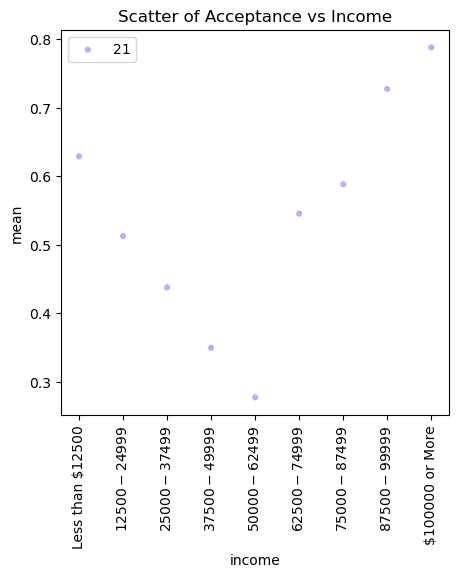

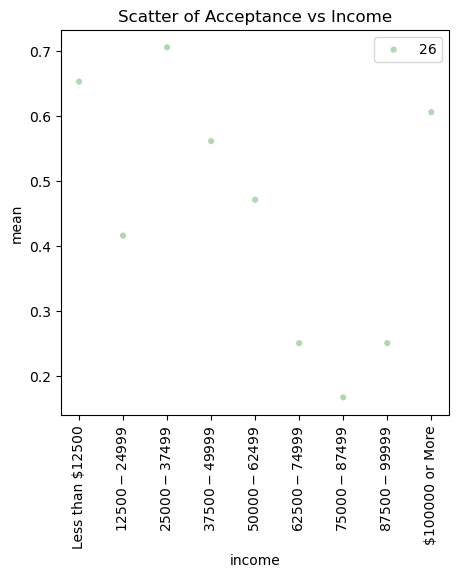

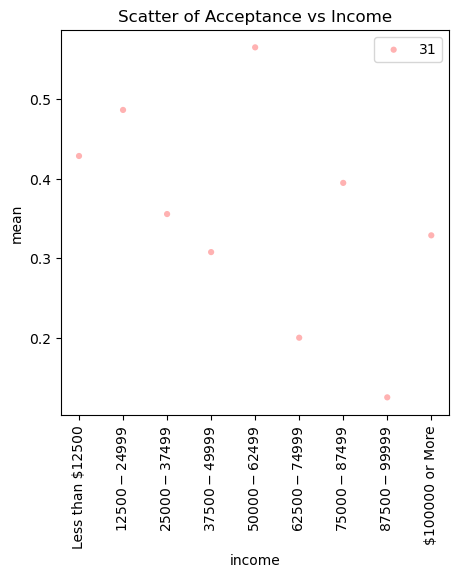

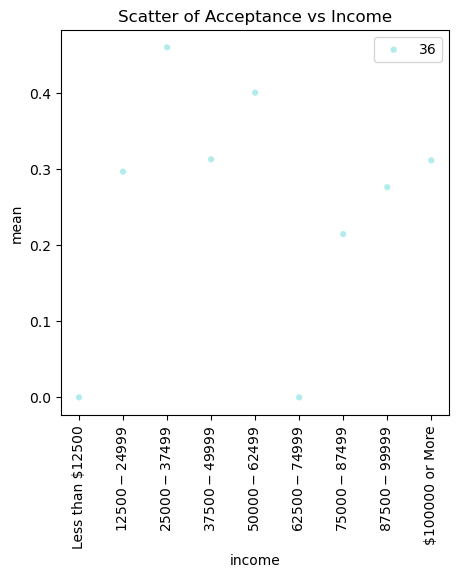

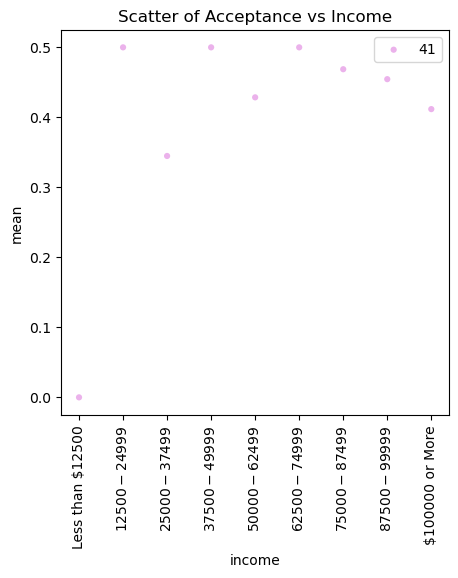

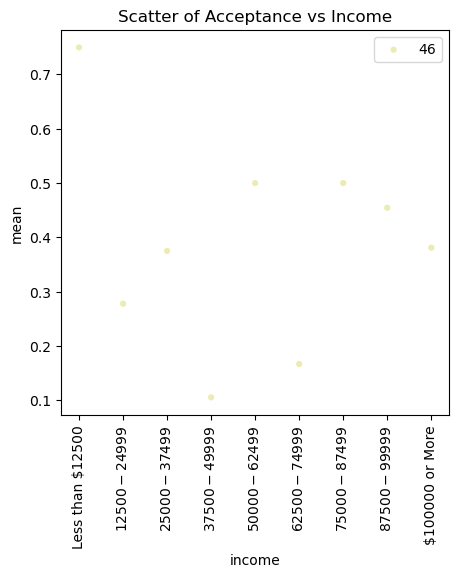

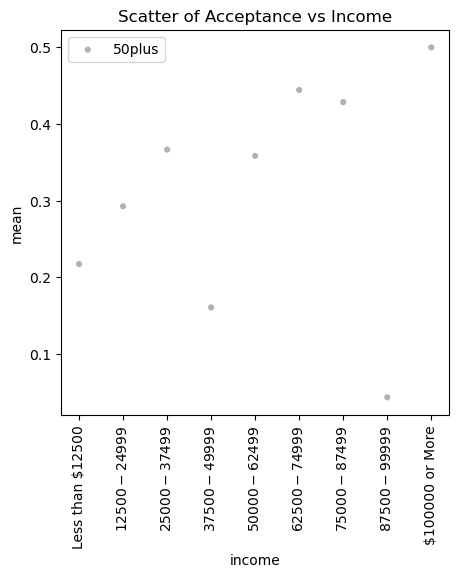

In [224]:
# Sort Income
income_sort_order = ['Less than $12500',
                     '$12500 - $24999',
                     '$25000 - $37499',
                     '$37500 - $49999',
                     '$50000 - $62499',
                     '$62500 - $74999',
                     '$75000 - $87499',
                     '$87500 - $99999',
                     '$100000 or More']
grouped_mean['income'] = pd.Categorical(grouped_mean['income'], categories=income_sort_order, ordered=True)
grouped_mean.sort_values(by='income', inplace=True)

# Generate plots by Age
dict_age_color = {"21": "b", 
                  "26": "g", 
                  "31": "r", 
                  "36" : "c", 
                  "41" : "m", 
                  "46" : "y", 
                  "50plus" : "k"}

for age,color in dict_age_color.items():
  print("average for",age,"is",grouped_mean[grouped_mean['age'] == age]['mean'].mean())
  grouped_mean[grouped_mean['age'] == age].plot.scatter(x = 'income', y = 'mean', \
                                                        title = "Scatter of Acceptance vs Income",\
                                                        c=color, label=age,alpha=0.3, edgecolors='none',\
                                                        figsize=(5, 5))
  plt.xticks(rotation=90)

In [226]:
# let's look at income and Bar visitations to see acceptance

groupedage_mean = barcouponsonly.groupby(['income','Bar'])['Y'].mean()
groupedage_mean = groupedage_mean.reset_index(name = 'mean')
#print(groupedage_mean)

average for never is 0.15647958250410554
average for less1 is 0.4187934950556639
average for 1~3 is 0.6494133071372958
average for 4~8 is 0.7845801316478006
average for gt8 is 0.8104166666666667
average for Less than $12500 is 0.6029146451033244
average for $12500 - $24999 is 0.5195241089170393
average for $25000 - $37499 is 0.6385173556602128
average for $37500 - $49999 is 0.557002672922716
average for $50000 - $62499 is 0.5906579041873159
average for $62500 - $74999 is 0.43053850507161207
average for $75000 - $87499 is 0.44904454837490554
average for $87500 - $99999 is 0.4843428184281843
average for $100000 or More is 0.617554079907021


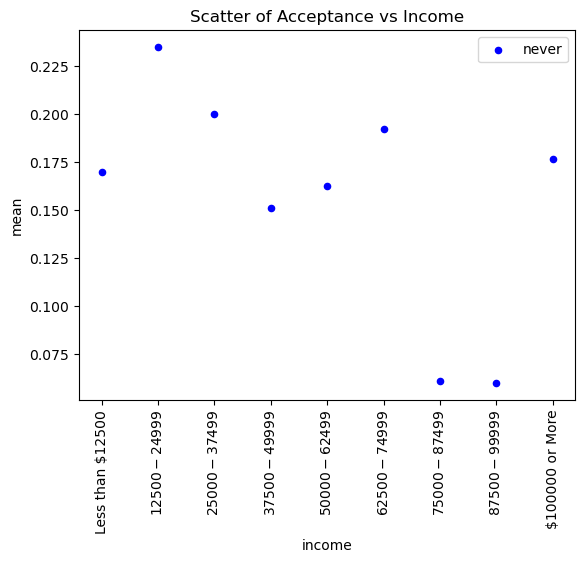

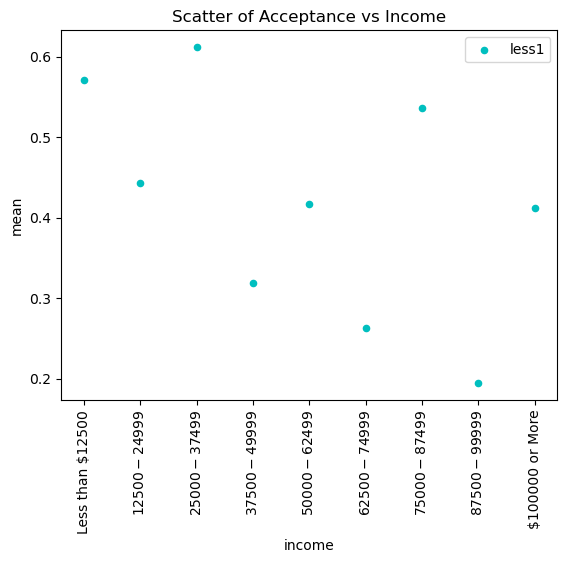

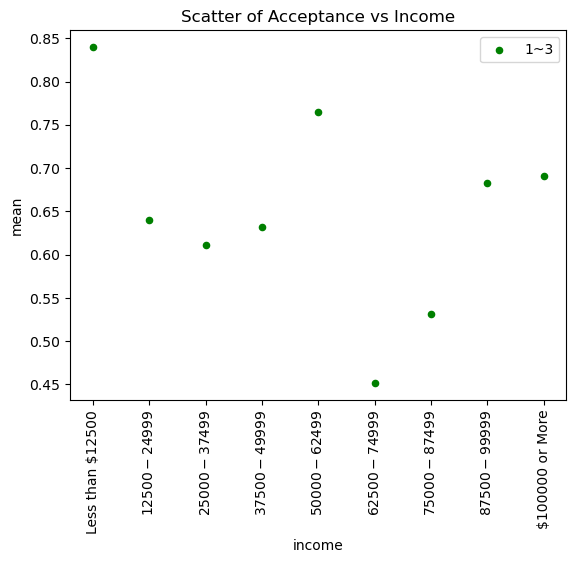

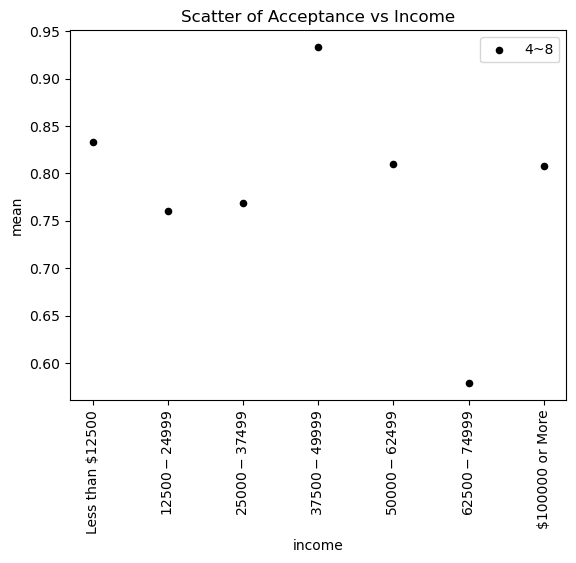

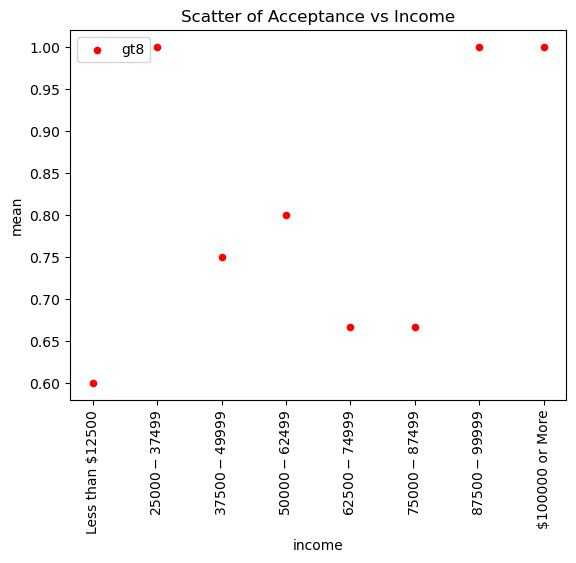

In [228]:
# Sort Income
bar_sort_order = ['never','less1','1~3','4~8','gt8']
groupedage_mean['Bar'] = pd.Categorical(groupedage_mean['Bar'], categories=bar_sort_order, ordered=True)
groupedage_mean.sort_values(by='Bar', inplace=True)
groupedage_mean['income'] = pd.Categorical(groupedage_mean['income'], categories=income_sort_order, ordered=True)
groupedage_mean.sort_values(by='income', inplace=True)

# Generate plots by Age
dict_income_color = {"Less than $12500": "tab:blue",
                     "$12500 - $24999": "tab:green",
                     "$25000 - $37499": "tab:red",
                     "$37500 - $49999": "tab:cyan",
                     "$50000 - $62499": "tab:brown",
                     "$62500 - $74999": "tab:yellow",
                     "$75000 - $87499": "tab:gray",
                     "$87500 - $99999": "tab:pink",
                     "$100000 or More": "tab:purple"}

bar_colors = {'never': 'b',
              'less1': 'c',
              '1~3': 'g',
              '4~8': 'k',
              'gt8': 'r'}

for bar,color in bar_colors.items():
   print("average for",bar,"is",groupedage_mean[groupedage_mean['Bar'] == bar]['mean'].mean())
   groupedage_mean[groupedage_mean['Bar'] == bar].plot.scatter(x = 'income', y = 'mean', \
                                                               title = "Scatter of Acceptance vs Income", \
                                                               color=color, label=bar)
   plt.xticks(rotation=90)

for income,color in dict_income_color.items():
   print("average for",income,"is",groupedage_mean[groupedage_mean['income'] == income]['mean'].mean())

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

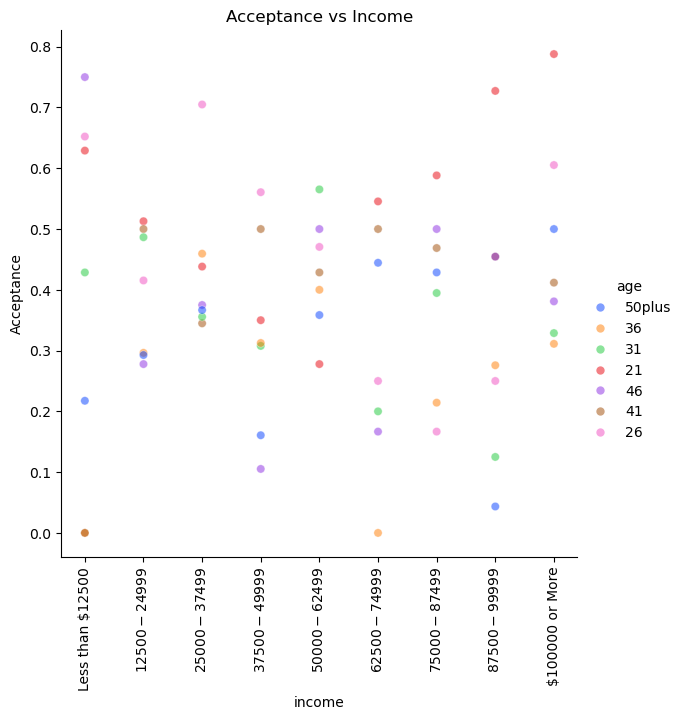

In [230]:
# use seaborn to replicate the income/mean graph by age

sns.relplot(x="income", y="mean", hue="age",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=grouped_mean)
plt.ylabel("Acceptance")
plt.title("Acceptance vs Income")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

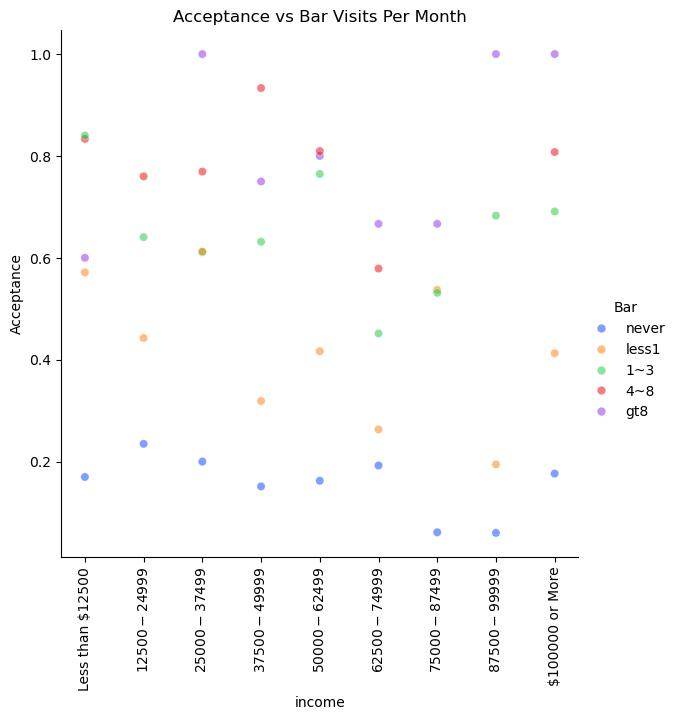

In [232]:
# Sort Income
bar_sort_order = ['never','less1','1~3','4~8','gt8']
groupedage_mean['Bar'] = pd.Categorical(groupedage_mean['Bar'], categories=bar_sort_order, ordered=True)
groupedage_mean.sort_values(by='Bar', inplace=True)
groupedage_mean['income'] = pd.Categorical(groupedage_mean['income'], categories=income_sort_order, ordered=True)
groupedage_mean.sort_values(by='income', inplace=True)

# Generate plots by Age
dict_income_color = {"Less than $12500": "tab:blue",
                     "$12500 - $24999": "tab:green",
                     "$25000 - $37499": "tab:red",
                     "$37500 - $49999": "tab:cyan",
                     "$50000 - $62499": "tab:brown",
                     "$62500 - $74999": "tab:yellow",
                     "$75000 - $87499": "tab:gray",
                     "$87500 - $99999": "tab:pink",
                     "$100000 or More": "tab:purple"}

bar_colors = {'never': 'b',
              'less1': 'c',
              '1~3': 'g',
              '4~8': 'k',
              'gt8': 'r'}

# use seaborn to replicate the income/mean graph by Bar vists per month

sns.relplot(x="income", y="mean", hue="Bar",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=groupedage_mean)
plt.ylabel("Acceptance")
plt.title("Acceptance vs Bar Visits Per Month")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, '4~8'),
  Text(4, 0, 'gt8')])

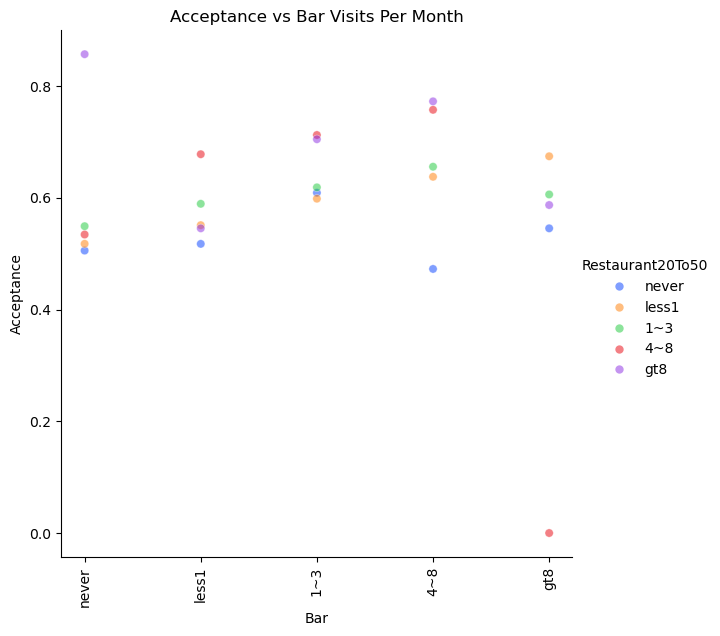

In [234]:
no_minors = df[df['age'] != 'below21']

groupedage_carry_mean = no_minors.groupby(['Bar','CarryAway'])['Y'].mean()
groupedage_carry_mean = groupedage_carry_mean.reset_index(name = 'mean')
groupedage_less20_mean = no_minors.groupby(['Bar','RestaurantLessThan20'])['Y'].mean()
groupedage_less20_mean = groupedage_less20_mean.reset_index(name = 'mean')
groupedage_more20_mean = no_minors.groupby(['Bar','Restaurant20To50'])['Y'].mean()
groupedage_more20_mean = groupedage_more20_mean.reset_index(name = 'mean')

groupedage_carry_mean['Bar'] = pd.Categorical(groupedage_carry_mean['Bar'], categories=bar_sort_order, ordered=True)
groupedage_carry_mean.sort_values(by='Bar', inplace=True)
groupedage_carry_mean['CarryAway'] = pd.Categorical(groupedage_carry_mean['CarryAway'], categories=bar_sort_order, ordered=True)
groupedage_carry_mean.sort_values(by='CarryAway', inplace=True)

groupedage_less20_mean['Bar'] = pd.Categorical(groupedage_less20_mean['Bar'], categories=bar_sort_order, ordered=True)
groupedage_less20_mean.sort_values(by='Bar', inplace=True)
groupedage_less20_mean['RestaurantLessThan20'] = pd.Categorical(groupedage_less20_mean['RestaurantLessThan20'], categories=bar_sort_order, ordered=True)
groupedage_less20_mean.sort_values(by='RestaurantLessThan20', inplace=True)

groupedage_more20_mean['Bar'] = pd.Categorical(groupedage_more20_mean['Bar'], categories=bar_sort_order, ordered=True)
groupedage_more20_mean.sort_values(by='Bar', inplace=True)
groupedage_more20_mean['Restaurant20To50'] = pd.Categorical(groupedage_more20_mean['Restaurant20To50'], categories=bar_sort_order, ordered=True)
groupedage_more20_mean.sort_values(by='Restaurant20To50', inplace=True)

sns.relplot(x="Bar", y="mean", hue="Restaurant20To50",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=groupedage_more20_mean)
plt.ylabel("Acceptance")
plt.title("Acceptance vs Bar Visits Per Month")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, '4~8'),
  Text(4, 0, 'gt8')])

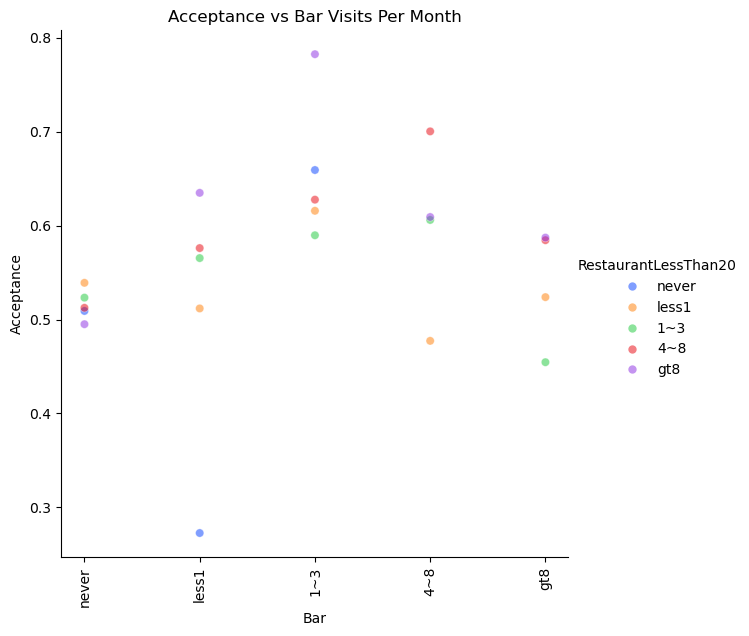

In [236]:
sns.relplot(x="Bar", y="mean", hue="RestaurantLessThan20",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=groupedage_less20_mean)
plt.ylabel("Acceptance")
plt.title("Acceptance vs Bar Visits Per Month")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, '4~8'),
  Text(4, 0, 'gt8')])

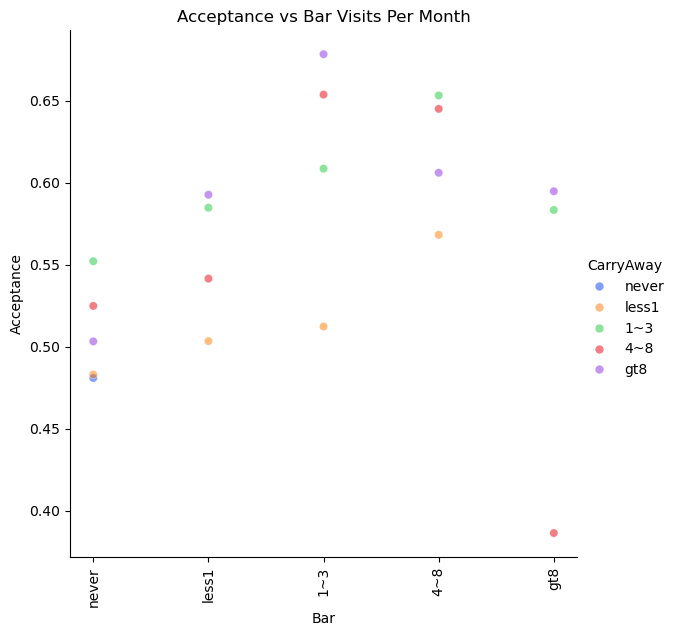

In [238]:
sns.relplot(x="Bar", y="mean", hue="CarryAway",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=groupedage_carry_mean)
plt.ylabel("Acceptance")
plt.title("Acceptance vs Bar Visits Per Month")
plt.xticks(rotation=90)